In [9]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trtarg_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trtarg_isol.xlsx']

In [11]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trtarg_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trtarg_isol.xlsx']

In [12]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['trained'] = df_target['trained'].replace(['trtarg'], ['target'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['trained'] = df_target_shuff['trained'].replace(['trtarg'], ['target'])

In [13]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['trained'] = df_distractor['trained'].replace(['trtarg'], ['target'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['trained'] = df_distractor_shuff['trained'].replace(['trtarg'], ['target'])


In [14]:
df = pd.concat([df_target, df_distractor])
df.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,-4.794391,ips,n001,2_0.2,signal,target,target
1,2.335,-9.479238,ips,n001,2_0.2,signal,target,target
2,4.670,-6.100251,ips,n001,2_0.2,signal,target,target
3,7.005,1.818535,ips,n001,2_0.2,signal,target,target
4,9.340,7.679894,ips,n001,2_0.2,signal,target,target


In [15]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,-0.627765,visual,d001,1_0.2,shuffle,target,target
1,2.335,-0.297670,visual,d001,1_0.2,shuffle,target,target
2,4.670,1.185859,visual,d001,1_0.2,shuffle,target,target
3,7.005,1.466606,visual,d001,1_0.2,shuffle,target,target
4,9.340,0.395745,visual,d001,1_0.2,shuffle,target,target


In [18]:
df_delay=[]
for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                ####
                if cond == '1_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &                                           
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                    ###
                    df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )
                    #                    
                elif cond == '2_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &  
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std() 
                    ###
                    df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )    
                    #
                elif cond =='1_7':
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )        
                        #
                    #
                #
                elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                        #
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                ###
            ###
        ##
    ##
##
##
##
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'


In [19]:
df_time=[]

for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                for t in df.times.unique(): 
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['item']==item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['item']==item)].decoding.mean()
                    #
                    decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff
                    df_time.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], item] )   
                    ####)
#
df_time = pd.DataFrame(df_time)
df_time.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'item']

Text(0.5,1,'d0.2 cond, tr: target alone')

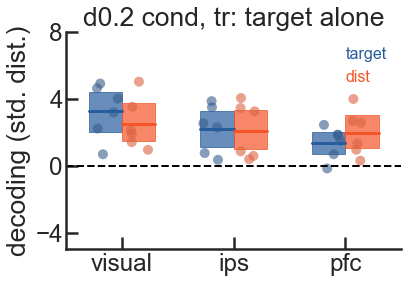

In [27]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['condition']!='1_7')  & (df_delay['condition']!='2_7')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('d0.2 cond, tr: target alone')

Text(0.5,1,'d7 cond, tr: target alone')

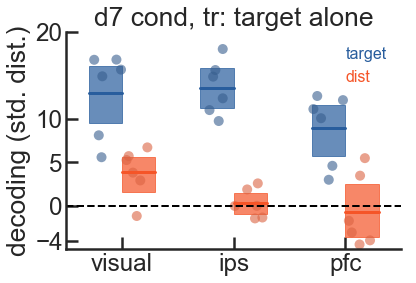

In [28]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay.loc[(df_delay['condition']!='1_0.2')  & (df_delay['condition']!='2_0.2')], 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('d7 cond, tr: target alone')

In [22]:
presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active


def tiemcourse_4_conditions(df_plot, title_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = ['darkblue',  'darkorange',  'darkgreen'] #sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(12,10))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -10 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 10 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response
        #
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.ylim(-20, 20)
        plt.yticks([-20, -10, 0 , 10, 20])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(frameon=False, bbox_to_anchor=(1.1, 1.05), fontsize=15)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=1, h_pad=1, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


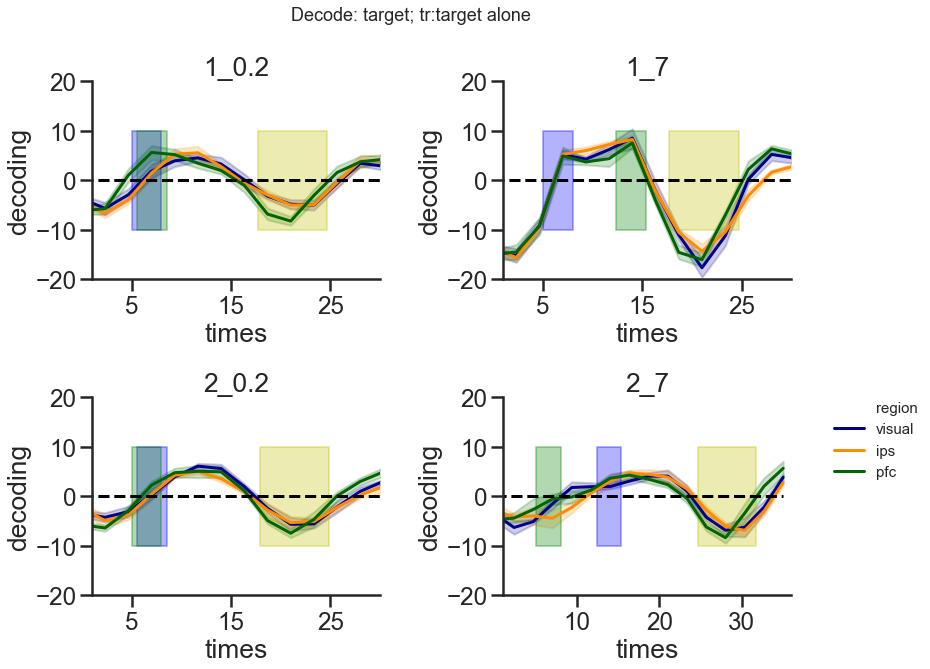

In [23]:
df_x = df_time.loc[(df_time['item']=='target') ]
tiemcourse_4_conditions(df_x , 'Decode: target; tr:target alone')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


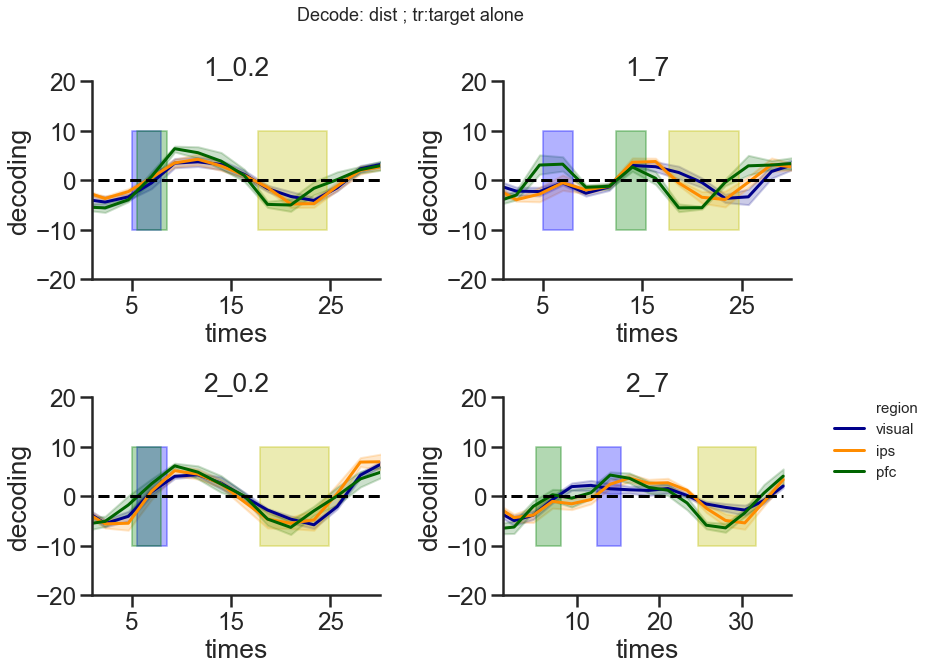

In [24]:
df_x = df_time.loc[(df_time['item']=='dist') ]
tiemcourse_4_conditions(df_x , 'Decode: dist ; tr:target alone')

In [ ]:
### Compare target decoding in condition 1_7 during distractor alone and after distractor presentation

In [16]:
df_delay=[]
for cond in [ '1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
             for item in ['targetA', 'targetB']: 
                    if item=='targetA':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']=='target')]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']=='target')]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )  
                    elif item=='targetB':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']=='target')]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']=='target')]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,8.080543,24.624214,visual,d001,1_7,signal,targetA,delay target alone
1,delay1,-5.256590,-5.100060,visual,d001,1_7,signal,targetB,delay target alone
2,delay1,3.105204,7.775706,visual,s001,1_7,signal,targetA,delay target alone
3,delay1,-8.258518,-11.894888,visual,s001,1_7,signal,targetB,delay target alone
4,delay1,5.566564,16.653789,visual,l001,1_7,signal,targetA,delay target alone


Text(0.5,1,'o1 d7, targetA vs target B')

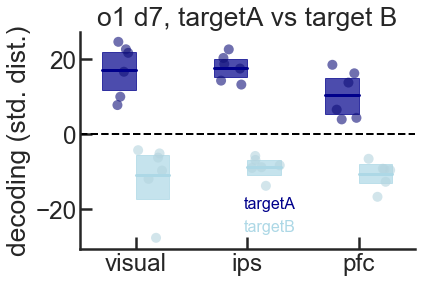

In [17]:

linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['targetA', 'targetB'],
            df=df_delay, 
            palette=['darkblue', 'lightblue'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-5,20)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7, targetA vs target B')

In [18]:
### second delay 1_7 compare decoding target and distractor, trained on target alone


In [19]:

df_delay=[]
for cond in [ '1_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
             for item in ['target', 'dist']: 
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &  
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                    ###
                    df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )   
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,-5.256590,-5.100060,visual,d001,1_7,signal,target,delay target alone
1,delay1,-0.982035,0.499462,visual,d001,1_7,signal,dist,delay target alone
2,delay1,-8.258518,-11.894888,visual,s001,1_7,signal,target,delay target alone
3,delay1,-1.293470,-1.586048,visual,s001,1_7,signal,dist,delay target alone
4,delay1,-5.842087,-6.226792,visual,l001,1_7,signal,target,delay target alone


Text(0.5,1,'o1 d7, second delay')

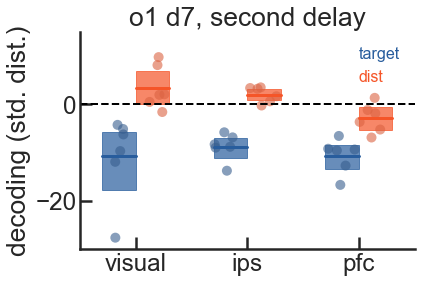

In [20]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-30,15)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7, second delay')

In [21]:
### second delay 1_7 with second delay 2_7 compare decoding target
#### (df['times']>= 16.345) & (df['times']<= 23.35)

In [22]:
df_delay=[]
for cond in [ '1_7', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            if cond=='1_7':
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']=='target')]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target')]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )  
            elif cond=='2_7':
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']=='target')]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target')]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )  

  
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,-5.256590,-5.100060,visual,d001,1_7,signal,dist,delay target alone
1,delay1,-8.258518,-11.894888,visual,s001,1_7,signal,dist,delay target alone
2,delay1,-5.842087,-6.226792,visual,l001,1_7,signal,dist,delay target alone
3,delay1,-7.539136,-9.670821,visual,n001,1_7,signal,dist,delay target alone
4,delay1,-4.041982,-4.247147,visual,b001,1_7,signal,dist,delay target alone


Text(0.5,1,'o1 d7 vs o2 d7')

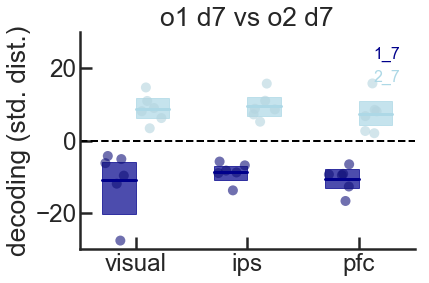

In [23]:
linares_plot(x='region', y='decoding_sh', hue='condition', order=['visual', 'ips', 'pfc'], hue_order=['1_7', '2_7'],
            df=df_delay, 
            palette=['darkblue', 'lightblue'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
plt.gca().set_ylim(-30,30)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7 vs o2 d7')

In [24]:

### distractor en 2_7 y en 1_7

In [25]:
df_delay=[]
for cond in [ '1_7', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            if cond=='1_7':
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']=='dist')]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist')]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )   
            elif cond=='2_7':
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']=='dist')]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist')]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )                 
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,-0.982035,0.499462,visual,d001,1_7,signal,dist,delay target alone
1,delay1,-1.293470,-1.586048,visual,s001,1_7,signal,dist,delay target alone
2,delay1,0.791584,2.086516,visual,l001,1_7,signal,dist,delay target alone
3,delay1,1.754065,1.967043,visual,n001,1_7,signal,dist,delay target alone
4,delay1,5.348108,8.119321,visual,b001,1_7,signal,dist,delay target alone


Text(0.5,1,'o1 d7 vs o2 d7')

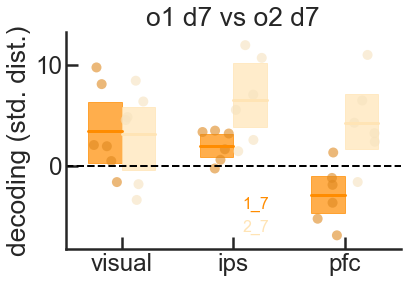

In [26]:
linares_plot(x='region', y='decoding_sh', hue='condition', order=['visual', 'ips', 'pfc'], hue_order=['1_7', '2_7'],
            df=df_delay, 
            palette=['darkorange', 'moccasin'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-30,30)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d7 vs o2 d7')

In [27]:

### distractor en 2_7 y target en 2_7
# (df['times']>= 16.345) & (df['times']<= 23.35) 
# (df['times']>= 16.345) & (df['times']<= 21.015) 
# (df['times']== 16.345) | (df['times']== 18.68  )

In [28]:
df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']>= 16.345) & (df['times']<= 21.015) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &  
                         ( df['item']==item)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']>= 16.345) & (df_shuff['times']<= 21.015) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']==item)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                ###
                df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              item] )   
              
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,1.295710,5.969234,visual,d001,2_7,signal,target,delay target alone
1,delay1,-2.076988,-3.628631,visual,d001,2_7,signal,dist,delay target alone
2,delay1,2.446671,3.132678,visual,s001,2_7,signal,target,delay target alone
3,delay1,4.387637,6.869065,visual,s001,2_7,signal,dist,delay target alone
4,delay1,5.662149,13.588613,visual,l001,2_7,signal,target,delay target alone


Text(0.5,1,'o2 d7, second delay')

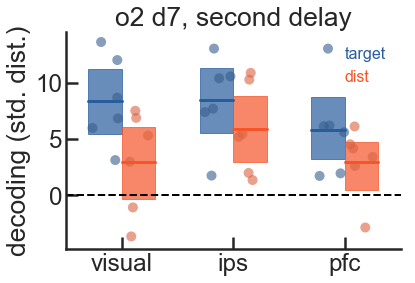

In [29]:
linares_plot(x='region', y='decoding_sh', hue='item', order=['visual', 'ips', 'pfc'], hue_order=['target', 'dist'],
            df=df_delay, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-30,15)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o2 d7, second delay')

In [30]:
#target en 1_02 y en 2_02

In [31]:
df_delay=[]
for cond in [ '1_0.2', '2_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            dfn = df.loc[(df['region']==reg) & 
                     ( (df['times']>= 9.34) & (df['times']<= 16.345)  ) & 
                     ( df['condition']==cond) & (df['subject']==subj) &  
                     ( df['item']=='target')]
            #
            dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                     ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 16.345)  ) & 
                     ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                     ( df_shuff['item']=='target')]

            ###
            decoding = dfn.decoding.mean() #option1
            #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
            decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
            ###
            df_delay.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                          item] )  


  
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay['trained'] = 'delay target alone'
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay1,0.830058,0.623998,visual,d001,1_0.2,signal,dist,delay target alone
1,delay1,2.841734,3.828957,visual,s001,1_0.2,signal,dist,delay target alone
2,delay1,3.691334,8.179025,visual,l001,1_0.2,signal,dist,delay target alone
3,delay1,4.620988,6.132963,visual,n001,1_0.2,signal,dist,delay target alone
4,delay1,6.833521,8.933606,visual,b001,1_0.2,signal,dist,delay target alone


Text(0.5,1,'o1 d0.2 vs o2 d0.2')

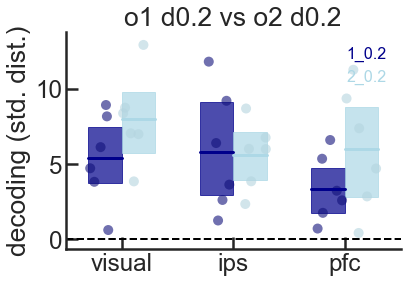

In [32]:
linares_plot(x='region', y='decoding_sh', hue='condition', order=['visual', 'ips', 'pfc'], hue_order=['1_0.2', '2_0.2'],
            df=df_delay, 
            palette=['darkblue', 'lightblue'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std. dist.)')
#plt.gca().set_ylim(-30,30)
#plt.gca().set_yticks([-4,0,5,10, 20])
plt.title('o1 d0.2 vs o2 d0.2')